In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import tensorflow as tf
import keras
from tensorflow import keras

model_filepath = '/content/drive/My Drive/bad_project/20200623_1755_1-5_100'

model = tf.keras.models.load_model(
    model_filepath,
    custom_objects=None,
    compile=False
)

model.summary()

Using TensorFlow backend.


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 256, 256, 1)]     0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 128, 128, 64)      640       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 128, 128, 128)     73856     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 64, 64, 128)       147584    
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 64, 64, 256)       295168    
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 32, 32, 256)       590080    
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 32, 32, 512)       1180

In [24]:
from os import listdir
import random

file_path = '/content/drive/My Drive/test_dataset/'
file_list = list()
for filename in listdir(file_path):
    file_list.append(filename)
# print(file_list)

test_files = file_list
print(test_files)
print(len(test_files))


['image00002.jpeg 的副本', 'image00006.jpeg 的副本', 'image00007.jpeg 的副本', 'image00005.jpeg 的副本', 'image00003.jpeg 的副本', 'image00009.jpeg 的副本', 'image00004.jpeg 的副本', 'image00008.jpeg 的副本']
8


In [25]:
import keras
from keras.engine import Layer
from keras.models import Sequential, Model
from keras.layers import Conv2D, Conv3D, UpSampling2D, InputLayer, Conv2DTranspose, Input, Reshape, merge, concatenate
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.layers.normalization import BatchNormalization
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.callbacks import TensorBoard

from skimage.color import rgb2lab, lab2rgb, rgb2gray, gray2rgb, lab2xyz
from skimage.transform import resize
import numpy as np

color_me = []
for imgName in test_files:
  img = img_to_array(load_img(file_path + imgName))
  img = resize(img ,(256,256))
  color_me.append(img)
  
color_me = np.array(color_me, dtype=float)
color_me = rgb2lab(1.0/255*color_me)[:,:,:,0]
color_me = color_me.reshape(color_me.shape+(1,))
# print(color_me.shape)
# print(color_me)

In [26]:
output = model.predict(color_me)
output = output * 128
# print(output)

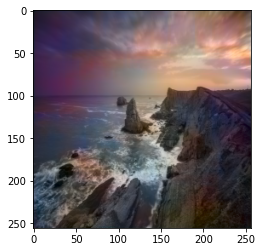

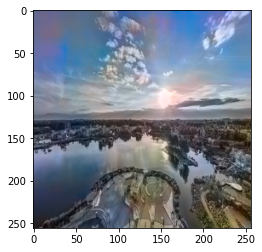

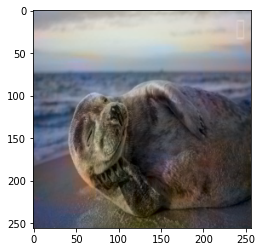

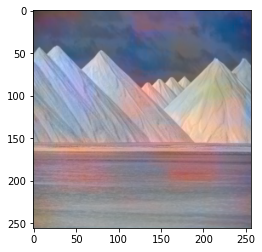

/usr/local/lib/python3.6/dist-packages/skimage/color/colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 83 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))


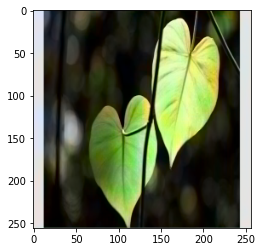

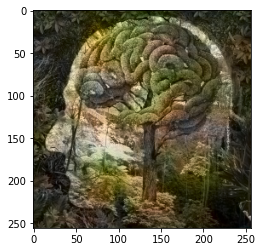

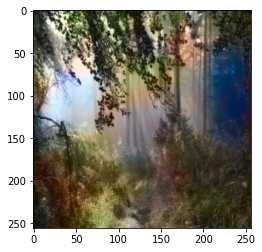

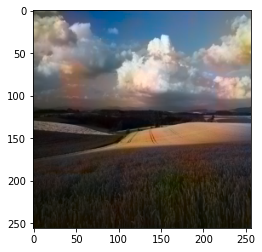

In [27]:
from matplotlib import image
from matplotlib import pyplot

# Output colorizations
for i in range(len(test_files)):
    result = np.zeros((256, 256, 3))
    result[:,:,0] = color_me[i][:,:,0]
    result[:,:,1:] = output[i]
    # imsave("result.png", lab2rgb(result))

    pyplot.imshow(lab2rgb(result))
    pyplot.show()

In [28]:
pip freeze > requirements.txt